# The Data Incubator: Capstone Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
import pylab
import calendar
import yaml
import math
from scipy import stats
from datetime import datetime
import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline


plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (8,4)
import tkinter
sns.set_style("whitegrid")
sns.set_style("white")
# sns.despine(fig=None)
import warnings
warnings.filterwarnings(action='ignore')

In [7]:
import pandas as pd
import glob

# path = r'C:\DRO\DCL_rawdata_files' # use your path
path = r'C:\Users\josephMNjerenga1\Desktop\Data Incubator\Capstone project\DataSet'  # use your path
all_files = glob.glob(path + "/*.csv")

data = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    data.append(df)

combined = pd.concat(data, axis=0, ignore_index=True)

In [8]:
combined.head()

,timestamp,hourly_traffic_count
0,2015-10-04 00:00:00,3
1,2015-10-04 00:05:00,12
2,2015-10-04 00:10:00,4
3,2015-10-04 00:15:00,9
4,2015-10-04 00:20:00,5


In [33]:
df = combined.copy()
df['date'] = pd.to_datetime(df['timestamp']).dt.date
df['time'] = pd.to_datetime(df['timestamp']).dt.time

In [34]:
df.head()

,timestamp,hourly_traffic_count,date,time
0,2015-10-04 00:00:00,3,2015-10-04,00:00:00
1,2015-10-04 00:05:00,12,2015-10-04,00:05:00
2,2015-10-04 00:10:00,4,2015-10-04,00:10:00
3,2015-10-04 00:15:00,9,2015-10-04,00:15:00
4,2015-10-04 00:20:00,5,2015-10-04,00:20:00


In [35]:
# Recreate your dataframe
df.date = pd.to_datetime(df.date)

# Create 3 new columns
df[['year','month','day']] = df.date.apply(lambda x: pd.Series(x.strftime("%Y,%m,%d").split(",")))

In [45]:
df['new_date'] = df['date']

In [46]:
df.head()

,timestamp,hourly_traffic_count,date,time,year,month,day,new_date
0,2015-10-04 00:00:00,3,2015-10-04,00:00:00,2015,10,04,2015-10-04
1,2015-10-04 00:05:00,12,2015-10-04,00:05:00,2015,10,04,2015-10-04
2,2015-10-04 00:10:00,4,2015-10-04,00:10:00,2015,10,04,2015-10-04
3,2015-10-04 00:15:00,9,2015-10-04,00:15:00,2015,10,04,2015-10-04
4,2015-10-04 00:20:00,5,2015-10-04,00:20:00,2015,10,04,2015-10-04


In [49]:
df['new_date'] = df['timestamp'].str.split(' ', expand=True) 

In [52]:
df["name_weekday"] = df.new_date.apply(lambda dateString : calendar.day_name[datetime.strptime(dateString,"%Y-%m-%d").weekday()])
df["name_month"] = df.new_date.apply(lambda dateString : calendar.month_name[datetime.strptime(dateString,"%Y-%m-%d").month])

In [53]:
df.head()

,timestamp,hourly_traffic_count,date,time,year,month,day,new_date,name_weekday,name_month
0,2015-10-04 00:00:00,3,2015-10-04,00:00:00,2015,10,04,2015-10-04,Sunday,October
1,2015-10-04 00:05:00,12,2015-10-04,00:05:00,2015,10,04,2015-10-04,Sunday,October
2,2015-10-04 00:10:00,4,2015-10-04,00:10:00,2015,10,04,2015-10-04,Sunday,October
3,2015-10-04 00:15:00,9,2015-10-04,00:15:00,2015,10,04,2015-10-04,Sunday,October
4,2015-10-04 00:20:00,5,2015-10-04,00:20:00,2015,10,04,2015-10-04,Sunday,October


[Text(0, 0.5, 'Average traffic count'),
 Text(0.5, 0, 'Day'),
 Text(0.5, 1.0, 'Average traffic count by day of the week')]

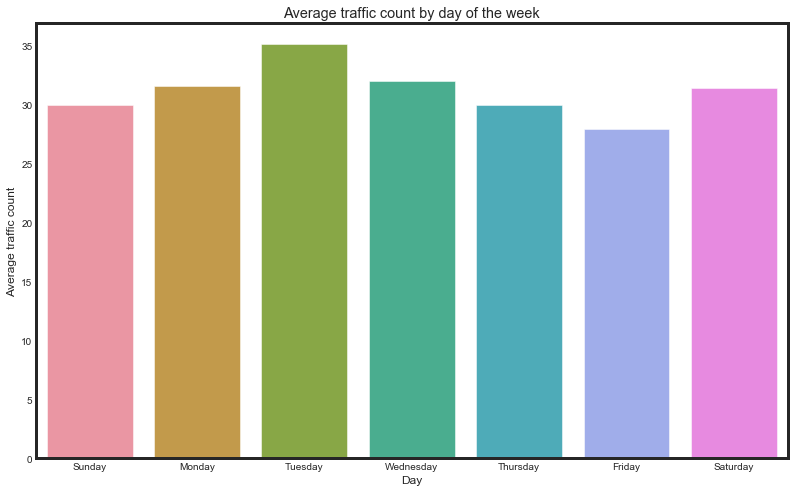

In [63]:
fig,(ax1)= plt.subplots(nrows=1)
fig.set_size_inches(12,8)
hueOrder = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]

dayAggregated = pd.DataFrame(df.groupby("name_weekday")["hourly_traffic_count"].mean()).reset_index()
daySorted = dayAggregated.sort_values(by="hourly_traffic_count", ascending=False)
sns.barplot(data=daySorted, x="name_weekday",y="hourly_traffic_count", order=hueOrder)
ax1.set(xlabel='Day', ylabel='Average traffic count', title="Average traffic count by day of the week")

In [65]:
df.head()

,timestamp,hourly_traffic_count,date,time,year,month,day,new_date,name_weekday,name_month
0,2015-10-04 00:00:00,3,2015-10-04,00:00:00,2015,10,04,2015-10-04,Sunday,October
1,2015-10-04 00:05:00,12,2015-10-04,00:05:00,2015,10,04,2015-10-04,Sunday,October
2,2015-10-04 00:10:00,4,2015-10-04,00:10:00,2015,10,04,2015-10-04,Sunday,October
3,2015-10-04 00:15:00,9,2015-10-04,00:15:00,2015,10,04,2015-10-04,Sunday,October
4,2015-10-04 00:20:00,5,2015-10-04,00:20:00,2015,10,04,2015-10-04,Sunday,October


In [73]:
df['hour'] = df['time'].str.split(':', expand=True) 

In [77]:
df.head()

,timestamp,hourly_traffic_count,date,time,year,month,day,new_date,name_weekday,name_month
0,2015-10-04 00:00:00,3,2015-10-04,00:00:00,2015,10,04,2015-10-04,Sunday,October
1,2015-10-04 00:05:00,12,2015-10-04,00:05:00,2015,10,04,2015-10-04,Sunday,October
2,2015-10-04 00:10:00,4,2015-10-04,00:10:00,2015,10,04,2015-10-04,Sunday,October
3,2015-10-04 00:15:00,9,2015-10-04,00:15:00,2015,10,04,2015-10-04,Sunday,October
4,2015-10-04 00:20:00,5,2015-10-04,00:20:00,2015,10,04,2015-10-04,Sunday,October


In [75]:
df = df.drop(['hour'], axis=1)

In [78]:
df[['hour','min','sec']] = df['time'].astype(str).str.split(':', expand=True).astype(int)

In [82]:
df.head()

,timestamp,hourly_traffic_count,date,time,year,month,day,new_date,name_weekday,name_month,hour,min,sec
0,2015-10-04 00:00:00,3,2015-10-04,00:00:00,2015,10,04,2015-10-04,Sunday,October,0,0,0
1,2015-10-04 00:05:00,12,2015-10-04,00:05:00,2015,10,04,2015-10-04,Sunday,October,0,5,0
2,2015-10-04 00:10:00,4,2015-10-04,00:10:00,2015,10,04,2015-10-04,Sunday,October,0,10,0
3,2015-10-04 00:15:00,9,2015-10-04,00:15:00,2015,10,04,2015-10-04,Sunday,October,0,15,0
4,2015-10-04 00:20:00,5,2015-10-04,00:20:00,2015,10,04,2015-10-04,Sunday,October,0,20,0


[Text(0, 0.5, 'Average traffic count'),
 Text(0.5, 0, 'Hour Of The Day'),
 Text(0.5, 1.0, 'Average traffic count by day of the week'),
 None]

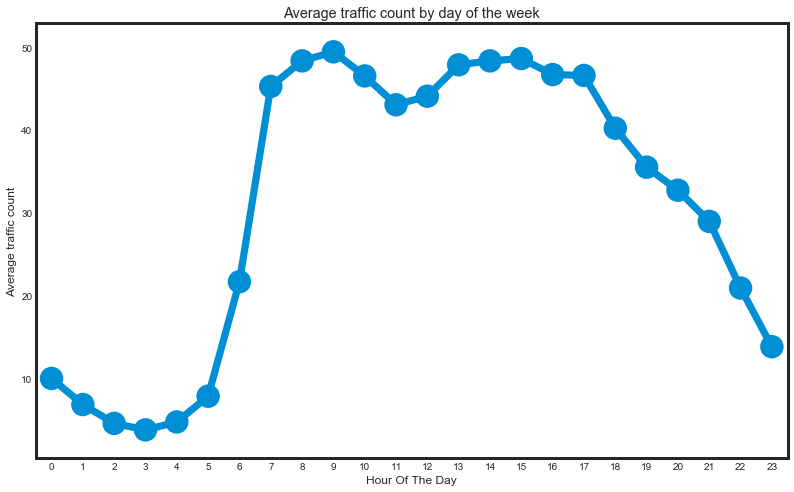

In [83]:
fig,(ax1)= plt.subplots(nrows=1)
fig.set_size_inches(12,8)

hourAggregated = pd.DataFrame(df.groupby(["hour"],sort=True)["hourly_traffic_count"].mean()).reset_index()
sns.pointplot(x=hourAggregated["hour"], y=hourAggregated["hourly_traffic_count"], data=hourAggregated, join=True, ax=ax1)
ax1.set(xlabel='Hour Of The Day', ylabel='Average traffic count',title="Average traffic count by day of the week",label='big')